In [3]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


In [4]:
df = pd.read_csv("D:/final-csv-files.csv")

In [5]:
df

,Image,Predicted Class_age,Probability_age,Emotion_class,Emotion_Probability,Predicted Class_gender,Probability_gender,Trafficking
0,18,3,0.599295,2,0.530614,1,0.999899,0
1,108,0,0.781809,4,0.344012,0,0.781662,0
2,1008,0,0.739945,4,0.340412,0,1.000000,0
3,1018,3,0.763107,3,0.514215,1,0.747440,0
4,1028,0,0.739945,4,0.340412,0,1.000000,0
...,...,...,...,...,...,...,...,...
1449,1958,3,0.886197,4,0.814770,1,0.891614,1
1450,1968,3,0.911301,2,0.379420,0,0.942016,1
1451,1978,3,0.963707,2,0.739500,0,0.962885,1
1452,1988,1,0.751266,4,0.930970,1,0.902773,1


In [6]:
X = df.drop(['Trafficking'], axis=1)

y = df['Trafficking']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
len(X_train)

1090

In [9]:
len(X_test)

364

In [10]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
#SVM
from sklearn.svm import SVC
model = svm.SVC()

In [12]:
model.fit(X_train, y_train)

SVC()

In [13]:
y_pred = model.predict(X_test)

In [14]:
# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9313186813186813


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [20]:
models = []
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(random_state=0)
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(random_state=0)
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=0)





In [21]:
from sklearn.metrics import classification_report, auc, precision_recall_curve, average_precision_score, cohen_kappa_score 
from sklearn.model_selection import cross_val_score

models.append(['SVM',SVC(random_state=0, probability=True)])
models.append(['Logistic Regression', logistic_regression_model])
models.append(['KNN', knn_model])
models.append(['Naive Bayes', naive_bayes_model])
models.append(['Random Forest', random_forest_model])





In [22]:
def run_models(X_train, y_train, X_test, y_test, models, kcv):

    lst_1 = []
    
    for i in range(len(models)):
    
        lst_2 = []
        name = models[i][0]
        clf = models[i][1]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
    
        cv_score = cross_val_score(clf, X_train, y_train, cv=kcv)
        #kfold_accuracy_scores.append(cv_scores.mean())


        # Calculate evaluation metrics
        conf_matrix = confusion_matrix(y_test, y_pred)
        acc_score = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        cohen_score = cohen_kappa_score(y_test, y_pred)
        
        # for Confusion Matrix
        plt.figure(figsize=(7,5))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title(name)
        plt.xlabel('Predict')
        plt.ylabel('Truth')
        plt.show()
        
        
        print("Classifier: ", models[i][0])
        print('')
        print("Confusion Matrix:\n", conf_matrix)
        print('')
        print("Accuracy Score: ", acc_score)
        print("Precision Score: ", precision)
        print("Recall Score: ", recall)
        print("F1 Score: ", f1)
        print("Cohen Score: ", cohen_score)
        print("K-Fold Accuracy Score: %.2f%%" % (np.mean(cv_score) * 100))
        print('')
        print("Classification Report:\n", classification_report(y_test, models[i][1].predict(X_test)))
        print("\n")
        
        lst_2.append(name)
        lst_2.append(acc_score*100)
        lst_2.append(cv_score.mean()*100)
        lst_2.append(cv_score.std()*100)
        lst_2.append(precision)
        lst_2.append(recall)
        lst_2.append(f1)
        lst_2.append(cohen_score)
        lst_1.append(lst_2)
        
    df1 = pd.DataFrame(lst_1, columns=['Model','Accuracy','K-Fold Mean Accuracy','Std.Deviation','Precision','Recall','F1 Score', 'Cohen-Kappa Score'])
    df1.sort_values(by=['Accuracy', 'K-Fold Mean Accuracy'],inplace=True,ascending=False)

    return df1

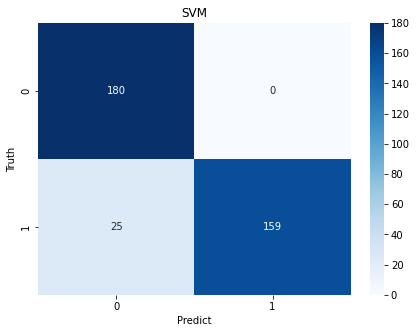

Classifier:  SVM

Confusion Matrix:
 [[180   0]
 [ 25 159]]

Accuracy Score:  0.9313186813186813
Precision Score:  0.9396944518895739
Recall Score:  0.9313186813186813
F1 Score:  0.9310456307540855
Cohen Score:  0.8628278564968345
K-Fold Accuracy Score: 92.84%

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       180
           1       1.00      0.86      0.93       184

    accuracy                           0.93       364
   macro avg       0.94      0.93      0.93       364
weighted avg       0.94      0.93      0.93       364





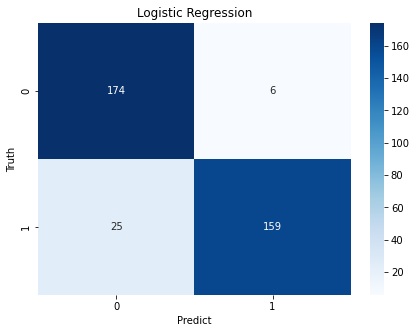

Classifier:  Logistic Regression

Confusion Matrix:
 [[174   6]
 [ 25 159]]

Accuracy Score:  0.9148351648351648
Precision Score:  0.9194945757759828
Recall Score:  0.9148351648351648
F1 Score:  0.9146516629487197
Cohen Score:  0.8298449846190965
K-Fold Accuracy Score: 91.19%

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       180
           1       0.96      0.86      0.91       184

    accuracy                           0.91       364
   macro avg       0.92      0.92      0.91       364
weighted avg       0.92      0.91      0.91       364





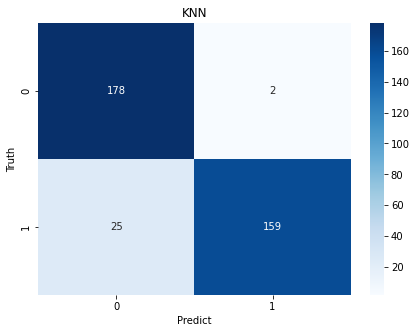

Classifier:  KNN

Confusion Matrix:
 [[178   2]
 [ 25 159]]

Accuracy Score:  0.9258241758241759
Precision Score:  0.9328208737075733
Recall Score:  0.9258241758241759
F1 Score:  0.925578859782515
Cohen Score:  0.8518362178134233
K-Fold Accuracy Score: 91.01%

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       180
           1       0.99      0.86      0.92       184

    accuracy                           0.93       364
   macro avg       0.93      0.93      0.93       364
weighted avg       0.93      0.93      0.93       364





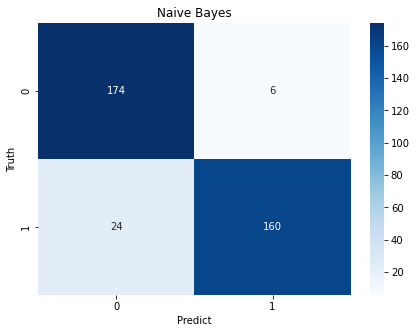

Classifier:  Naive Bayes

Confusion Matrix:
 [[174   6]
 [ 24 160]]

Accuracy Score:  0.9175824175824175
Precision Score:  0.9217890543191748
Recall Score:  0.9175824175824175
F1 Score:  0.9174254317111461
Cohen Score:  0.835323923271806
K-Fold Accuracy Score: 89.63%

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       180
           1       0.96      0.87      0.91       184

    accuracy                           0.92       364
   macro avg       0.92      0.92      0.92       364
weighted avg       0.92      0.92      0.92       364





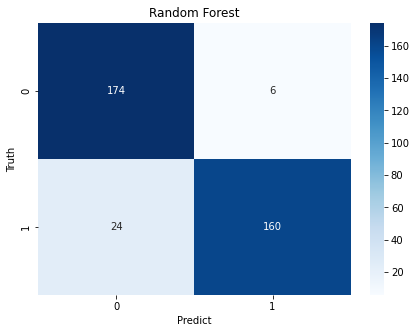

Classifier:  Random Forest

Confusion Matrix:
 [[174   6]
 [ 24 160]]

Accuracy Score:  0.9175824175824175
Precision Score:  0.9217890543191748
Recall Score:  0.9175824175824175
F1 Score:  0.9174254317111461
Cohen Score:  0.835323923271806
K-Fold Accuracy Score: 93.76%

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       180
           1       0.96      0.87      0.91       184

    accuracy                           0.92       364
   macro avg       0.92      0.92      0.92       364
weighted avg       0.92      0.92      0.92       364





In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
results = run_models(X_train, y_train, X_test, y_test, models, 10)